In [ ]:
!git clone https://github.com/stuniy/SPO_PGU.git

Cloning into 'SPO_PGU'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 168 (delta 2), reused 0 (delta 0), pack-reused 161
Receiving objects: 100% (168/168), 74.99 MiB | 18.04 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (54/54), done.


## Очистка данных

##### Очистка данных
–это процесс обнаружения и исправления (или удаления) поврежденных или неточных записей из набора записей, таблицы или базы данных. Процесс включает в себя выявление неполных, неправильных, неточных или несущественных данных, а затем замену, изменение или удаление «загрязненных» данных.

отсутствующих данных;

нетипичных данных – выбросов;

неинформативных данных – дубликатов;

несогласованных данных – одних и тех же данных, представленных в разных регистрах или форматах.

## Данные

##### Базой для наших экспериментов послужит набор данных пациентов больных диабетом, найденный на Kaggle.
Мы не станем очищать всю базу целиком, но разберем на ее основе главные методы и операции.

In [ ]:
# импорт пакетов
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

##### Загрузка данных

In [ ]:
# чтение данных
df = pd.read_csv('/content/SPO_PGU/diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
# выведем размер и тип данных
print(df.shape)
print(df.dtypes)

(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [ ]:
 # отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

[]


Мы выделили Числовые и Категориальными признаки, так как они обрабатывются по разному.

### В этом наборе данных не так много переменных. Начнем с исследования целевой переменной - price_doc. Сначала давайте сделаем диаграмму рассеяния, чтобы увидеть, есть ли в данных выбросы.

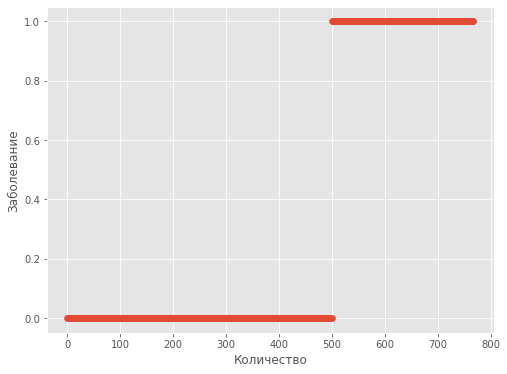

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.Outcome.values))
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Заболевание', fontsize=12)
plt.show()

График выглядит нормально. Так как у нас выходная переменная может принимать значения либо 0, либо 1.

### Отсутствующие данные

Существует три типа возникновения пропусков: **MCAR, MAR, MNAR**.
**MCAR**  («совершенно  случайно  пропущенные»  –  Missing  Completely At Random) – тип возникнования пропусков, при котором вероятность про- пуска для каждого наблюдения набора одинакова. Вероятность пропуска значения для переменной X не связана ни со значением самой переменной X, ни со значениями других переменных в наборе данных.


> Например, переменная Доход подчиняется условию MCAR, если клиенты, которые не сообщают о своем доходе, имеют в среднем такой же размер дохода, что и клиенты, которые указывают свой доход.



**MAR** («случайно пропущенные» – Missing At Random) – тип возникновения пропусков, когда данные
пропущены не случайно, а ввиду некоторых закономерностей. Вероятность пропуска значения для
переменной X может быть объяснена другими имеющимися переменными, не содержащими пропуски.


> Например, переменная Доход подчиняется условию MAR, если вероятность пропуска данных в переменной Доход зависит от наблюдаемой переменной, например от переменной Образование. Например, клиенты с низким уровнем образования могут иметь большее количество пропущенных значений дохода (т. е. чаще, чем другие респонденты, не отвечают на вопрос о доходе). Необходимо проанализировать взаимосвязь между переменной Доход и переменной Образование.


**MNAR** («не случайно пропущенные» – Missing Not At Random) – тип про- пущенных данных, когда пропуск значения не является совершенно случай- ным и не может быть полностью объяснен другими переменными в наборе. Пропущенные значения остаются зависимыми от неизвестных нам факторов, необходимо провести дополнительные исследования.


> Здесь можно привести вышеописанный случай с пропусками в переменной Доход, но только теперь переменная Образование у нас отсутствует.




Отсутствие данных снижает репрезентативность выборки и, следовательно, может исказить выводы о генеральной совокупности. Работа с отсутствующими значениями – одна из самых сложных, но и самых распространенных проблем очистки. Большинство моделей не предполагают пропусков. Рассмотрим три метода обнаружения отсутствующих данных в наборе.
Для того чтобы найти отсутствие данные можно использовать функцию `describe()` библиотеки Pandas.

In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Мы можем видеть, что есть столбцы, которые имеют минимальное значение ноль (0). В некоторых столбцах нулевое значение не имеет смысла и указывает на недопустимое или отсутствующее значение.

В различных выборках пустые значения могут быть отмечены как `NaN, 0, *, ?` и т.д.

В Python, в частности `Pandas, NumPy и Scikit-Learn`, мы отмечаем пропущенные значения как `NaN`.

Значения со значением `NaN` игнорируются в таких операциях, как `sum, count`.

Мы можем легко пометить значения как `NaN` с помощью `Pandas DataFrame`, используяфункция `replace()` на подмножестве интересующих нас столбцов.

После того, как мы отметили пропущенные значения, мы можем использовать функцию `isnull()` пометить все значения `NaN` в наборе данных как True и получить счетчик пропущенных значений для каждого столбца.

In [ ]:
# заменяем данные в столбце
Pregnancies= df['Pregnancies']
Pregnancies=Pregnancies.replace(0, np.NaN)

#заменяем данные во всем наборе
cols = df.columns[:8] # выбираем только входные столбцы
df_new = df[cols].replace(0, np.NaN)
df_new['Outcome']=df['Outcome']
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7430005827801592312, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7430005827801592312, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7430005827801592312, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7430005827801592312, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7430005827801592312, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7430005827801592312, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7430005827801592312, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7430005827801592312, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7430005827801592312, *[[['Pregnancies', 'Glucose'], ['Glucose', 'BloodPressure'], ['BloodPressure', 'SkinThickness'], ['SkinThickness', 'Insulin']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7430005827801592312, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7430005827801592312, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7430005827801592312, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7430005827801592312, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7430005827801592312, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7430005827801592312, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7430005827801592312, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7430005827801592312, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7430005827801592312 = autoviz.get_df('df_7430005827801592312')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7430005827801592312, *[[['Pregnancies', 'Glucose'], ['Glucose', 'BloodPressure'], ['BloodPressure', 'SkinThickness'], ['SkinThickness', 'Insulin']]], **{})
chart

#### Процентный список пропущенных данных

Если в наборе много признаков и визуализация занимает много времени, можно составить список долей отсутствующих записей для каждого признака.

In [ ]:
# смотрим количество пропусков по каждой переменной
print(df_new.shape[0])
df_new.isnull().sum()*100/df_new.shape[0]


768


Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
# или так
for col in df_new.columns:
    pct_missing = np.mean(df_new[col].isnull())
    k=round(pct_missing*100)
    print('{} - {}%'.format(col, k))

Pregnancies - 14%
Glucose - 1%
BloodPressure - 5%
SkinThickness - 30%
Insulin - 49%
BMI - 1%
DiabetesPedigreeFunction - 0%
Age - 0%
Outcome - 0%


# Что делать с пропущенными значениями?
Не существует общих решений для проблемы отсутствующих данных. Для каждого конкретного набора приходится искать наиболее подходящие методы или их комбинации.

Разберем четыре самых распространенных техники. Они помогут в простых ситуациях, но, скорее всего, придется проявить творческий подход и поискать нетривиальные решения, например, промоделировать пропуски.



## Метод удаления по списку

Первая техника в статистике называется методом удаления по списку и заключается в простом отбрасывании записи, содержащей пропущенные значения. Это решение подходит только в том случае, если недостающие данные не являются информативными.

Удаление по списку влияет на статистическую мощность проведенных тестов. Статистическая мощность частично зависит от большого размера выборки. Поскольку удаление по списку исключает данные с пропущенными значениями, оно сокращает выборку, которая подвергается статистическому анализу.
Удаление по списку также проблематично, когда причина отсутствия данных может быть не случайной (например, вопросы в анкетах направлены на извлечение конфиденциальной информации). Из-за метода большая часть данных испытуемых будет исключена из анализа, что приведет к систематической ошибке в выводах данных. Например, анкета может включать вопросы об истории употребления наркотиков респондентами, текущих доходах. Многие из испытуемых в выборке могут не отвечать из-за навязчивого характера вопросов, но могут отвечать на все остальные вопросы. Удаление по списку исключает этих респондентов из анализа. Это может создать предвзятость, поскольку участники, которые разглашают эту информацию, могут иметь другие характеристики, чем участники, которые не делайте этого.


In [ ]:
# отбрасываем строки с большим количеством пропусков
df_del= df_new.dropna()
df_del
#Отбросьте столбцы, в которых отсутствует хотя бы один элемент.
#df_del= df_new.dropna(axis='columns')

#Оставьте только строки с как минимум двумя значениями, отличными от NA.
#df_del= df_new.dropna(thresh=2)

#Определите, в каких столбцах искать отсутствующие значения.
#df_del= df_new.dropna(subset=['Insulin', 'SkinThickness'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
751,1.0,121.0,78.0,39.0,74.0,39.0,0.261,28,0
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0


Запустив этот пример, мы увидим, что количество строк было агрессивно сокращено с 768 в исходном наборе данных до 392, при этом все строки, содержащие NaN, были удалены.

## Отбрасывание признаков
Как и предыдущая техника, отбрасывание признаков может применяться только для неинформативных признаков.

В процентном списке, построенном ранее, мы увидели, что признак Insulin имеет высокий процент недостающих значений – 49%. Мы можем полностью отказаться от этого признака:

In [ ]:
cols_to_drop = ['Insulin']
df_less_Insulin = df_del.drop(cols_to_drop, axis=1)
df_less_Insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89.0,66.0,23.0,28.1,0.167,21,0
6,3.0,78.0,50.0,32.0,31.0,0.248,26,1
8,2.0,197.0,70.0,45.0,30.5,0.158,53,1
13,1.0,189.0,60.0,23.0,30.1,0.398,59,1
14,5.0,166.0,72.0,19.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...
751,1.0,121.0,78.0,39.0,39.0,0.261,28,0
755,1.0,128.0,88.0,39.0,36.5,1.057,37,1
760,2.0,88.0,58.0,26.0,28.4,0.766,22,0
763,10.0,101.0,76.0,48.0,32.9,0.171,63,0


Из приведенной таблице видно, что мы удалили столбез Инсулин

## Внесение недостающих значений
Для численных признаков можно воспользоваться методом принудительного заполнения пропусков.
Например, на место пропуска можно записать среднее или медианное значение, полученное из остальных
записей.
В случае данных, имеющих асимметричное распределение, предпочитают
использовать медиану, а не среднее, так как на нее не влияет небольшое число наблюдений c очень
большими или очень маленькими значениями.

Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся
значение.

Вновь обратите внимание, что замена средним, медианой и прочими статистиками необходимо
выполнять после разбиения набора данных на обучающую и тестовую выборки (внутри цикла перекрестной
проверки).
Помимо замены средним или медианой, пропуски можно заменить значениями-константами. Для
древовидных алгоритмов эффективной может быть замена значением вне диапазона имеющихся значений.
Если изаменять значением, которое будет больше любого имеющегося значения, то в дереве можно
будет выбрать такое разбиение по этому признаку, что все наблюдения с известными значениями пойдут
в левый узел, а все наблюдения с пропусками – в правый.

Часто применяют индикатор пропусков для соответствующей переменной. Он принимает значение 1, если
переменная имеет пропуск, или 0, если переменная не содержит пропуск. В рамках бизнес-подхода
индикатор пропусков носит временный характер. Мы строим уравнение регрессии и смотрим, является
ли коэффициент для данного индикатора значимым. Если коэффициент значим, то выбор способа
замены признака, для которого создавался индикатор, может существенно повлиять на качество
модели. Если коэффициент не является значимым, то выбор способа замены признака, для которого создавался индикатор, не повлияет существенно на качество модели. Это необходимо для
приоритизации операций замен для десятков-сотен признаков. Допустим, у нас 200 признаков с
пропусками, нужно выяснить, для каких признаков имеет смысл пробовать разные способы замены, а
каким признакам будет достаточно замены медианой или средним.



Возьмем для примера признак Pregnancies и заменим все недостающие значения медианой этого признака:

Pandas имеет функцию `fillna()` для замены пропущенных значений конкретным значением.

Например, мы можем использовать `fillna()`, чтобы заменить отсутствующие значения средним значением для каждого столбца следующим образом:

In [ ]:
med = df_less_Insulin['Pregnancies'].median()
print(med)
df_less_Insulin['Pregnancies'] = df_less_Insulin['Pregnancies'].fillna(med)
df_less_Insulin

3.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89.0,66.0,23.0,28.1,0.167,21,0
6,3.0,78.0,50.0,32.0,31.0,0.248,26,1
8,2.0,197.0,70.0,45.0,30.5,0.158,53,1
13,1.0,189.0,60.0,23.0,30.1,0.398,59,1
14,5.0,166.0,72.0,19.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...
751,1.0,121.0,78.0,39.0,39.0,0.261,28,0
755,1.0,128.0,88.0,39.0,36.5,1.057,37,1
760,2.0,88.0,58.0,26.0,28.4,0.766,22,0
763,10.0,101.0,76.0,48.0,32.9,0.171,63,0


Одну и ту же стратегию принудительного заполнения можно применить сразу для всех числовых признаков:

In [ ]:
df_numeric = df_new.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df_new[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # выполняет только вставку для столбцов, в которых отсутствуют значения.
        print('подстановка пропущенных значений для: {}'.format(col))
        med = df_new[col].median()
        df_new[col] = df_new[col].fillna(med)
df_new

подстановка пропущенных значений для: Pregnancies
подстановка пропущенных значений для: Glucose
подстановка пропущенных значений для: BloodPressure
подстановка пропущенных значений для: SkinThickness
подстановка пропущенных значений для: Insulin
подстановка пропущенных значений для: BMI


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47,1


## Одномерное и многомерное восстановление.

Одним из типов алгоритма восстановления является одномерный, который вменяет значения в i-м измерении признака, используя только не пропущенные значения в этом измерении признака (например, `impute.SimpleImputer`). Напротив, многомерные алгоритмы восстановления используют весь набор доступных измерений характеристик для оценки недостающих значений (например, `impute.IterativeImputer`).

## Одномерное восстановление признаков
Класс` SimpleImputer` библиотеки` scikit-learn` предоставляет основные стратегии для восстановления отсутствующих значений. Пропущенные значения могут быть восстановлены с использованием предоставленного постоянного значения или с использованием статистики (среднего, медианного или наиболее частого) каждого столбца, в котором находятся пропущенные значения. Этот класс также допускает различные кодировки пропущенных значений.

Следующий фрагмент демонстрирует, как заменить отсутствующие значения, закодированные как np.nan, с использованием среднего значения столбцов (ось 0), содержащих отсутствующие значения:


In [ ]:
from sklearn.impute import SimpleImputer
# Создаём объект класса SimpleImputer с параметрами:
# - помечаем пропуски, как np.nan
# - указываем арифметическое среднее в качестве стратегии заполнения
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Настраиваем алгоритм обучения
imputer = imputer.fit(df_new)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imputer.transform(df_new.loc[:,:]), columns = df_new.columns)

df_new1.round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00,148.0,72.0,35.00,155.55,33.6,0.63,50.0,1.0
1,1.00,85.0,66.0,29.00,155.55,26.6,0.35,31.0,0.0
2,8.00,183.0,64.0,29.15,155.55,23.3,0.67,32.0,1.0
3,1.00,89.0,66.0,23.00,94.00,28.1,0.17,21.0,0.0
4,4.49,137.0,40.0,35.00,168.00,43.1,2.29,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.00,101.0,76.0,48.00,180.00,32.9,0.17,63.0,0.0
764,2.00,122.0,70.0,27.00,155.55,36.8,0.34,27.0,0.0
765,5.00,121.0,72.0,23.00,112.00,26.2,0.24,30.0,0.0
766,1.00,126.0,60.0,29.15,155.55,30.1,0.35,47.0,1.0


В процессе настройки (обучения)` SimpleImputer` вычисляет средние значения по каждому столбцу матрицы. При трансформации вычисленные средние значения вставляются вместо пропусков.

Заполнитель, настроенный на одной матрице, можно использовать для трансформации другой матрицы с близкими значениями. Например, модель машинного обучения для диагностики некоторого заболевания обучается на данных различных анализов. Некоторые значения анализов могут быть пропущены (пациент не сдавал эти анализы). Пропущенные значения заполнены с помощью заполнителя. При обследовании пациента с помощью обученной модели вводятся результаты его анализов. Если какой то анализ отсутствует, то можно без большой погрешности заполнить его значение с помощью заполнителя.

Матрицы, на которой настраивается заполнитель, и заполняемая матрица должны иметь одинаковой число столбцов, число строк может отличаться.

Класс `SimpleImputer` также поддерживает заполнение категориальных значений, представленных в виде обычных строк или типом "`category`" в библиотеке `pandas`. В таких случаях в качестве стратегии заполнения следует выбирать "`most_frequent`" (наиболее частое) или "`constant`" (константа):


In [ ]:
# Пример заполнения категориальных данных
from sklearn.impute import SimpleImputer
import pandas as pd
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

## Многомерное восстановление признаков
Более сложный подход заключается в использовании `IterativeImputer` класса, который моделирует каждую функцию с пропущенными значениями в зависимости от других функций и использует эту оценку для восстановления. Это происходит в итеративном циклическом режиме: на каждом шаге столбец функций обозначается как выходные y, а другие столбцы функций обрабатываются как входные X. Регрессор подходит на (X, y) для известного y. Затем регрессор используется для прогнозирования недостающих значений y. Это выполняется для каждой функции итеративно, а затем повторяется для `max_iter` раундов восстановления. Возвращаются результаты последнего раунда восстановления.

**Примечание**

В данный момент алгоритм многомерного заполнения в `Scikit-learn` является экспериментальным, поэтому перед использованием `IterativeImputer` нужно делать дополнительный импорт `from sklearn.experimental import enable_iterative_imputer`,  который позволяет использовать данный алгоритм. Алгоритм тестируется и совершенствуется: результаты прогнозов и API могут измениться без каких-либо предупреждений. Поэтому необходимо следить за документацией.


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
# Настраиваем алгоритм обучения
imp = imp.fit(df_new)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imp.transform(df_new.loc[:,:]), columns = df_new.columns)

df_new1.round(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00,148.0,72.0,35.00,220.14,33.6,0.63,50.0,1.0
1,1.00,85.0,66.0,29.00,71.73,26.6,0.35,31.0,0.0
2,8.00,183.0,64.0,21.28,264.52,23.3,0.67,32.0,1.0
3,1.00,89.0,66.0,23.00,94.00,28.1,0.17,21.0,0.0
4,4.27,137.0,40.0,35.00,168.00,43.1,2.29,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.00,101.0,76.0,48.00,180.00,32.9,0.17,63.0,0.0
764,2.00,122.0,70.0,27.00,160.73,36.8,0.34,27.0,0.0
765,5.00,121.0,72.0,23.00,112.00,26.2,0.24,30.0,0.0
766,1.00,126.0,60.0,28.24,178.05,30.1,0.35,47.0,1.0


## Нетипичные данные (выбросы)
Выбросы – это данные, которые существенно отличаются от других наблюдений. Они могут соответствовать реальным отклонениям, но могут быть и просто ошибками. Причины выбросов:

•	Из-за ошибки измерения.

•	Из-за необычной природы входных данных. Например, если наугад измерять температуру предметов в комнате, получим цифры от 18 до 22 °C, но радиатор отопления будет иметь температуру в 70°.

•	Выбросы могут быть и частью распределения — так, в нормальном распределении каждое 22-е измерение будет выходить из «двух сигм», и каждое 370-е — из трёх.

Поскольку множество статистических методов «буксуют» на выборках с выбросами, выбросы приходится обнаруживать (желательно — автоматически) и исключать из выборки. Простейшие способы основаны на межквартильном расстоянии — например, всё, что не попадает в диапазон


![img](https://drive.google.com/uc?id=10ptQvOHBTg-egkE0gSh2q2RhG83Rix6s)
считается выбросами. Более тонкие критерии — критерий Шовене, критерий Граббса, критерий Пирса, критерий Диксона. Для численных и категориальных признаков используются разные методы изучения распределения, позволяющие обнаружить выбросы. Если признак численный, можно построить гистограмму или коробчатую диаграмму (ящик с усами). На диаграмме «ящик с усами» выбросы рисуют точками выше и ниже «усов».

![img](https://drive.google.com/uc?id=1JsBHCwHT1ux5O-VdTMBS_FPfOAkCwpZv)

Хорошей статистикой для суммирования выборки негауссовых распределений данных является Interquartile Range, или IQR для краткости. IQR рассчитывается как разница между 75-м и 25-м процентилями данных и определяет прямоугольник на графике прямоугольника. IQR может использоваться для определения выбросов путем определения пределов значений выборки, которые являются фактором IQR ниже 25-го процентиля или выше 75-го процентиля.

Итак, мы выдаем кредиты и фиксируем сумму кредита в базе данных. Аналитик, работая с базой,
видит, что размер кредита варьирует в диапазоне от 10 тыс. до 100 тыс. долларов, и вдруг встречает
наблюдение, в котором размер кредита равен 20 млн долларов. Начинающий аналитик часто спешит избавиться от выбросов, например делает винзоризацию – процедуру, в ходе которой выбросам присваиваются значения, равные соответственно нижней или верхней границе (например, 5-му и 95-му процентилю), относительно которых идентифицируются выбросы (двухсторонняя винзоризация). Нередко винзоризацию выполняют при задании только одной границы – верхней или нижней (односторонняя винзоризация).

Допустим, мы выполнили односторонную винзоризацию по верхней границе, приравняли значение 20 млн
долларов к значению, соответствующему 99-му процентилю. Но позже выясняется, что это пришел Билл
Гейтс и запол- нил анкету, ему выдали кредит на сумму больше, чем 99-й процентиль, потому что он
намного богаче, чем 99-й процентиль. Выдав один кредит Биллу Гейтсу, банк может заработать больше
денег, чем на всех остальных клиентах вместе взятых. И без риска. Это пример того, когда выброс обусловлен объективными причинами и важно понимать, что выброс – это не всегда плохо. Если мы выполним винзоризацию, потеряем ценную информацию. В свое время кризис 2008 года был обусловлен тем, что многие аналитики недооценили риски, исключив из данных объективные выбросы.

Возьмем другой пример. Менеджер, фиксируя доход работающего пенсио- нера, ввел вместо 20 000 сумму
в 200 000 рублей. Данн й выброс обусловлен
ошибкой и нуждается в замене средним или медианой.




#### Гистограмма/коробчатая диаграмма
Если признак численный, можно построить гистограмму или коробчатую диаграмму (ящик с усами). Посмотрим на примере уже знакомого нам признака  SkinThickness.

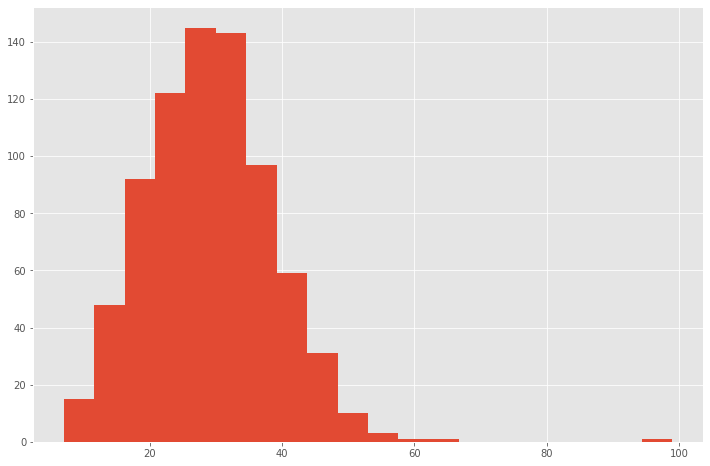

In [ ]:
df_new1['SkinThickness'].hist(bins=20)

Чтобы изучить особенность поближе, построим коробчатую диаграмму.

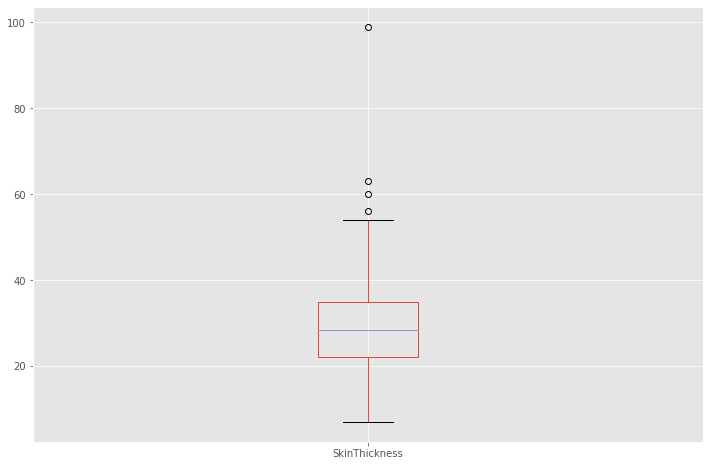

In [ ]:
df_new1.boxplot(column=['SkinThickness'])

Видим, что есть выброс со значением около 100.

### Описательная статистика
Отклонения численных признаков могут быть слишком четкими, чтобы не визуализироваться коробчатой диаграммой. Вместо этого можно проанализировать их описательную статистику.

Например, для признака SkinThickness видно, что максимальное значение равно 99, в то время как 75% квартиль равен только 32. Значение 99 – выброс.

In [ ]:
df_new['SkinThickness'].describe()

count    768.000000
mean      29.108073
std        8.791221
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

### Что делать?
Выбросы довольно просто обнаружить, но выбор способа их устранения слишком существенно зависит от
специфики набора данных и целей проекта. Их обработка во многом похожа на обработку пропущенных
данных, которую мы разбирали в предыдущем разделе. Можно удалить записи или признаки с выбросами,
либо скорректировать их, либо оставить без изменений.

In [ ]:
df_new_del = df_new1.drop(np.where(df_new1['SkinThickness'] >= 33)[0])

In [ ]:
df_new_del['SkinThickness'].describe()

count    530.000000
mean      24.015673
std        5.924552
min        7.000000
25%       19.775921
50%       25.000000
75%       29.000000
max       32.934441
Name: SkinThickness, dtype: float64

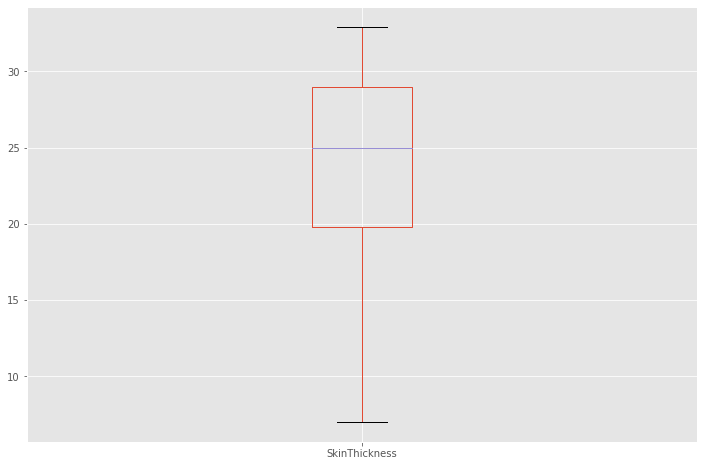

In [ ]:
df_new_del.boxplot(column=['SkinThickness'])

Переходим к более простой части очистки данных – **удалению мусора**.

Вся информация, поступающая в модель, должна служить целям проекта. Если она не добавляет никакой
ценности, от нее следует избавиться.

Три основных типа «ненужных» данных:
- неинформативные признаки с большим количеством одинаковых значений,
- нерелевантные признаки,
- дубликаты записей.

Рассмотрим работу с каждым типом отдельно.

## Неинформативные признаки
Если признак имеет слишком много строк с одинаковыми значениями, он не несет полезной информации
для проекта.

#### Как обнаружить?
Составим список признаков, у которых более 95% строк содержат одно и то же значение.

In [ ]:
num_rows = len(df_new.index)
low_information_cols = []

for col in df_new.columns:
    cnts = df_new[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    print(top_pct*100)

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()



23.307291666666664
2.213541666666667
10.286458333333332
31.770833333333332
49.21875
1.8229166666666667
0.78125
9.375
65.10416666666666


Как видно таких признаков нет.

#### Что делать?

Если после анализа причин получения повторяющихся значений вы пришли к выводу, что признак не несет полезной информации, используйте  drop()

## Нерелевантные признаки
Нерелевантные признаки обнаруживаются ручным отбором и оценкой значимости. Например, признак,
регистрирующий температуру воздуха в Торонто точно не имеет никакого отношения к прогнозированию
цен на российское жилье. Если
признак не имеет значения для проекта, его нужно исключить.


## Дубликаты записей
Если значения признаков (всех или большинства) в двух разных записях совпадают, эти записи
называются дубликатами.


#### Как обнаружить повторяющиеся записи?
Способ обнаружения дубликатов зависит от того, что именно мы считаем дубликатами. Например, в
наборе данных есть уникальный идентификатор id . Если две записи имеют одинаковый id , мы считаем, что это одна и та же запись.
Удалим все неуникальные записи:


In [ ]:
# отбрасываем неуникальные строки
df_dedupped = df_new_del.drop('id', axis=1).drop_duplicates()

# сравниваем формы старого и нового наборов
print(df_new_del.shape)
print(df_dedupped.shape)
df_dedupped


(767, 9)
(767, 8)


,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,60.0,29.0,125.0,30.1,0.349,47,1


Другой распространенный способ вычисления дубликатов: по набору ключевых признаков.
Например, неуникальными можно считать записи с одним и тем же: артериальным давлением, толщиной кожи, инсулином и возрастом. Найдем в нашем наборе дубликаты по группе критических признаков – BloodPressure, SkinThickness,Insulin ,Age:


In [ ]:
key = ['BloodPressure', 'SkinThickness','Insulin', 'Age']

df_new_del.fillna(-999).groupby(key)['Pregnancies'].count().sort_values(ascending=False).head(20)

df_dedupped2 = df_new_del.drop_duplicates(subset=key)

print(df_new_del.shape)
print(df_dedupped2.shape)
df_dedupped2

(767, 9)
(732, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47,1


Как видно 35 строк были удалены.

Большая проблема очистки данных – разные форматы записей. Для корректной работы модели важно, чтобы
набор данных соответствовал определенным стандартам – необходимо тщательное исследование с учетом
специфики самих данных. Мы рассмотрим четыре самых распространенных несогласованности:
- Разные регистры символов.
- Разные форматы данных (например, даты).
- Опечатки в значениях категориальных признаков.


## Разные регистры символов
Непоследовательное использование разных регистров в категориальных значениях является очень
распространенной ошибкой, которая может существенно повлиять на анализ данных.

In [ ]:
#df['sub_area'].value_counts(dropna=False)

Но если в какой-то записи вместо Poselenie Sosenskoe окажется poselenie sosenskoe , они будут расценены как два разных значения.
Эта проблема легко решается принудительным изменением регистра:

In [ ]:
# пусть все будет в нижнем регистре

#df['sub_area_lower'] = df['sub_area'].str.lower()
#df['sub_area_lower'].value_counts(dropna=False)


## Разные форматы данных
Ряд данных в наборе находится не в том формате, с которым нам было бы удобно работать. Например,
даты, записанные в виде строки, следует преобразовать в формат  DateTime


In [ ]:
df_new_del
print(df_new_del.dtypes)

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Так наши форматы соотвествуют показателя, приводить мы ничего не будем.

## Опечатки
Опечатки в значениях категориальных признаков приводят к таким же проблемам, как и разные регистры символов. Их можно только визуально отследить. Для этого проверим каждое текстовый показатель на уникальность.  

In [ ]:
data_train['Name'].unique()

# Работа с текстовыми данными и их обработка

При работе с большим объёмом данных важно поддерживать их чистоту.

In [ ]:
data_train = pd.read_csv('/content/SPO_PGU/test_titanic.csv')
data_test  = pd.read_csv('/content/SPO_PGU/test_titanic.csv')
print(data_train)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [ ]:
# отбор числовых колонок
df_numeric = data_train.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['PassengerId' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']


In [ ]:
 # отбор нечисловых колонок
df_non_numeric = data_train.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


Из проделанного выше анализа видно, что числовых показателей у нас 7, а не числовых - 5. Далее будем работать только с текстовыми данными.

## Опечатки
Опечатки в значениях категориальных признаков приводят к таким же проблемам, как и разные регистры
символов. Их можно только визуально отследить. Для этого проверим каждое текстовый показатель на уникальность.

In [ ]:
data_train['Name'].unique()

array(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)',
       'Myles, Mr. Thomas Francis', 'Wirz, Mr. Albert',
       'Hirvonen, Mrs. Alexander (Helga E Lindqvist)',
       'Svensson, Mr. Johan Cervin', 'Connolly, Miss. Kate',
       'Caldwell, Mr. Albert Francis',
       'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       'Davies, Mr. John Samuel', 'Ilieff, Mr. Ylio',
       'Jones, Mr. Charles Cresson',
       'Snyder, Mrs. John Pillsbury (Nelle Stevenson)',
       'Howard, Mr. Benjamin',
       'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)',
       'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
       'Keane, Mr. Daniel', 'Assaf, Mr. Gerios',
       'Ilmakangas, Miss. Ida Livija',
       'Assaf Khalil, Mrs. Mariana (Miriam")"', 'Rothschild, Mr. Martin',
       'Olsen, Master. Artur Karl',
       'Flegenheim, Mrs. Alfred (Antoinette)',
       'Williams, Mr. Richard Norris II',
       'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)',
       'Robins, Mr. Alexander

In [ ]:
data_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data_train['Ticket'].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [ ]:
data_train['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [ ]:
data_train['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

Из приведенного анализа, можно сделать вывод:
1. Name - можно выделить мужчин и женщин
2. Sex - можно закодировать значениями 0/1
3. Ticket - остается без изменений, так как показатель имеет буквенно числовое значение, заполнить средним мы его не сможем, его стоит удалить.
4. Cabin - есть пустые значения
5. Embarked - есть пустые значения, так как этот показатель имеет всего 3 вида значений мы его можем закодировать.

В представленных показателях опечаток не обнаружено

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() #закодировали пол
data_train['Sex'] = labelencoder.fit_transform(data_train['Sex'])
print(data_train)

     PassengerId  Pclass                                          Name  Sex  \
0            892       3                              Kelly, Mr. James    1   
1            893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2            894       2                     Myles, Mr. Thomas Francis    1   
3            895       3                              Wirz, Mr. Albert    1   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   
..           ...     ...                                           ...  ...   
413         1305       3                            Spector, Mr. Woolf    1   
414         1306       1                  Oliva y Ocana, Dona. Fermina    0   
415         1307       3                  Saether, Mr. Simon Sivertsen    1   
416         1308       3                           Ware, Mr. Frederick    1   
417         1309       3                      Peter, Master. Michael J    1   

      Age  SibSp  Parch              Ticket      Fa

Давайте посмотрим на поле Embarked, в котором находится порт посадки и проверим есть ли такие пассажиры у которых порт не указан:

In [ ]:
data_train[data_train.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Итак у нас нашлось 2 таких пассажира. Давайте присвоим эти пассажирам порт в котором село больше всего людей:

In [ ]:
MaxPassEmbarked = data_train.groupby('Embarked').count()['PassengerId']
data_train.Embarked[data_train.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]
print(data_train)

     PassengerId  Pclass                                          Name  Sex  \
0            892       3                              Kelly, Mr. James    1   
1            893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2            894       2                     Myles, Mr. Thomas Francis    1   
3            895       3                              Wirz, Mr. Albert    1   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   
..           ...     ...                                           ...  ...   
413         1305       3                            Spector, Mr. Woolf    1   
414         1306       1                  Oliva y Ocana, Dona. Fermina    0   
415         1307       3                  Saether, Mr. Simon Sivertsen    1   
416         1308       3                           Ware, Mr. Frederick    1   
417         1309       3                      Peter, Master. Michael J    1   

      Age  SibSp  Parch              Ticket      Fa

In [ ]:
data_train['Embarked'] = labelencoder.fit_transform(data_train['Embarked'])
print(data_train)

     PassengerId  Pclass                                          Name  Sex  \
0            892       3                              Kelly, Mr. James    1   
1            893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2            894       2                     Myles, Mr. Thomas Francis    1   
3            895       3                              Wirz, Mr. Albert    1   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   
..           ...     ...                                           ...  ...   
413         1305       3                            Spector, Mr. Woolf    1   
414         1306       1                  Oliva y Ocana, Dona. Fermina    0   
415         1307       3                  Saether, Mr. Simon Sivertsen    1   
416         1308       3                           Ware, Mr. Frederick    1   
417         1309       3                      Peter, Master. Michael J    1   

      Age  SibSp  Parch              Ticket      Fa

Пункт отправления также привели к числовому формату

## Разные регистры символов
Непоследовательное использование разных регистров в категориальных значениях является очень
распространенной ошибкой, которая может существенно повлиять на анализ данных.

In [ ]:
#df['sub_area'].value_counts(dropna=False)

Но если в какой-то записи вместо jacques окажется Jacques, они будут расценены как два разных значения.
Эта проблема легко решается принудительным изменением регистра:

In [ ]:
# пусть все будет в нижнем регистре

data_train['Name'] = data_train['Name'].str.lower()
#df['sub_area_lower'].value_counts(dropna=False)
print(data_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              braund, mr. owen harris    1  22.0      1   
1    cumings, mrs. john bradley (florence briggs th...    0  38.0      1   
2                               heikkinen, miss. laina    0  26.0      0   
3         futrelle, mrs. jacques heath (lily may peel)    0  35.0      1   
4                             allen, mr. william henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

Теперь остались поля с имя пассажира, номером билета и каюта. По сути нам эти три поля не нужны.

In [ ]:
data_train = data_train.drop(['Name','Ticket','Cabin'],axis=1)
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,NaN,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


### Обработка редких категорий

Часто бывает, что наши переменные содержат редкие категории. Редкие категории являются источником
шума в данных, который негативно повлияет на качество модели. Кроме того, при разбиении набора
данных на обучающую и тестовую выборки может оказаться, что данная категория отсутствует в обучающей выборке, но присутствует в тестовой выборке. Это вызовет проблемы при моделировании.

Например, логистическая регрессия, встретив в тестовых данных наблюдение с неизвестной категорией
признака, не сможет вычислить прогноз, потому что категория не будет соответствовать схеме дамми-кодирования, полученной для переменной в обучающей выборке, и таким образом не будет вычислен соответствующий регрессионный коэффициент.
Давайте импортируем необходимые библиотеки и класс и загрузим данные с редкими категориями.


In [ ]:
# импортируем необходимые библиотеки и класс
import pandas as pd
import numpy as np
from collections import defaultdict

In [ ]:
# загружаем данные
data = pd.read_csv('/content/SPO_PGU/Rare_categories.csv', sep=';')
# выводим наблюдения
data.head()

,TARGET,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR
0,0,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал
1,0,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности
2,0,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности
3,0,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности
4,0,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности


In [ ]:
# создаем список категориальных переменных
cat_cols = data.dtypes[data.dtypes == 'object'].index.tolist()
# смотрим частоты по категориальным переменным
for col in cat_cols:
  print(data[col].name)
  print(data[col].value_counts(dropna=False))
  print('')

GEN_INDUSTRY
Торговля                                     2385
Другие сферы                                 1709
NaN                                          1367
Металлургия/Промышленность/Машиностроение    1356
Государственная служба                       1286
Здравоохранение                              1177
Образование                                   998
Транспорт                                     787
Сельское хозяйство                            702
Строительство                                 574
Коммунальное хоз-во/Дорожные службы           533
Ресторанный бизнес/Общественное питание       408
Наука                                         403
Нефтегазовая промышленность                   225
Сборочные производства                        172
Банк/Финансы                                  169
Энергетика                                    145
Развлечения/Искусство                         141
ЧОП/Детективная д-ть                          136
Информационные услуги                

Если переменная содержит 2–3 редкие категории небольшой частоты, скорее всего, такие категории случайны и часто могли быть обусловлены очевидными ошибками ввода.

Множественные редкие категории часто объединяют в одну отдельную категорию, если подтверждается гипотеза о том, что редкие категории описывают определенный паттерн.

Например, в кредитном скоринге укрупне- ние редких категорий в отдельную категорию нередко улучшает результат. Редкие типы кредитов могут соответствовать кредитам, выданным на эксклюзивных условиях, подобные кредиты выдаются людям с хорошей кредитной историей, и, таким образом, объединив редкие категории в отдельную группу, мы выделяем группу заемщиков с лучшим кредитным статусом. Кроме того, применяется случайное присвоение редких категорий уже существующим категориям.


In [ ]:
# записываем указанные категории переменной
# JOB_DIR в отдельную категорию OTHER
lst = ['Реклама и маркетинг', 'Юридическая служба']
data.loc[data['JOB_DIR'].isin(lst), 'JOB_DIR'] = 'OTHER'
# смотрим частоты
data['JOB_DIR'].value_counts(dropna=False)

Участие в основ. деятельности    11452
NaN                               1367
Вспомогательный техперсонал       1025
Бухгалтерия, финансы, планир.      481
Адм-хоз. и трансп. службы          279
Снабжение и сбыт                   217
Служба безопасности                164
Кадровая служба и секретариат      101
Пр-техн. обесп. и телеком.          75
OTHER                               62
Name: JOB_DIR, dtype: int64

#### Появление новых категорий в новых данных


Существует еще проблема появления новых категорий в новых данных.

Например, мы разработали и внедрили скоринговую модель. К моменту внедрения модели маркетинговая или кредитная политика банка поменялась, и у нас в переменной Сфера занятости появилась новая категория Няни, воспитательницы.

В банках часто применяется консервативный подход: новая категория приравнивается к категории, демонстрирующей наибольший уровень риска, потому что мы ничего не знаем об этой категории клиентов и их возможном кредитном статусе.


В новых данных появилась категория CP.
В функцию предобработки, которую мы будем применять к новым данным, добавим программный код, заменяющий все новые категории модой, т. е. категорией CC.


In [ ]:
# все новые категории переменной pay заменяем модой
lst = ['CC', 'Auto', 'CH']
replace_new_values = lambda s: 'CC' if s not in lst else s
df['pay'] = df['pay'].map(replace_new_values)

## Домашнее задание

1. Загрузить выборку с сайта Kaggle.com.
2. Провести анализ полученной выборки на наличие пропущенных данных.
3. Заполнить пропуски в данных
4. Выявить выбросы по показателям и удалить их
